In [1]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve

In [2]:
# Step 2: Load Dataset
df = pd.read_csv('application_train.csv')

In [3]:
# Step 3: Basic Preprocessing
# Drop columns with more than 40% missing values
missing = df.isnull().mean()
df = df.loc[:, missing < 0.4]

# Separate categorical and numerical
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns.drop('TARGET')

# Fill missing values
df[cat_cols] = df[cat_cols].fillna('Missing')
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Label encode categorical columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [4]:
# Step 4: Feature Selection

X = df.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = df['TARGET']

In [5]:
# Step 5: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [6]:
# Step 6: Model Training

model = LogisticRegression(max_iter=5000, solver='liblinear', verbose=1)
model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(max_iter=5000, solver='liblinear', verbose=1)

In [8]:
# Step 7: Predictions and Probabilities

y_probs = model.predict_proba(X_test)[:, 1]

In [9]:
# Step 8: Business Cost Optimization

# Define costs: FP = approving bad loan, FN = rejecting good customer
cost_fp = 10000   # False Positive (bad approved)
cost_fn = 1000    # False Negative (good rejected)

thresholds = np.linspace(0.01, 0.99, 100)
total_costs = []

for thresh in thresholds:
    preds = (y_probs >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    total_cost = (fp * cost_fp) + (fn * cost_fn)
    total_costs.append(total_cost)

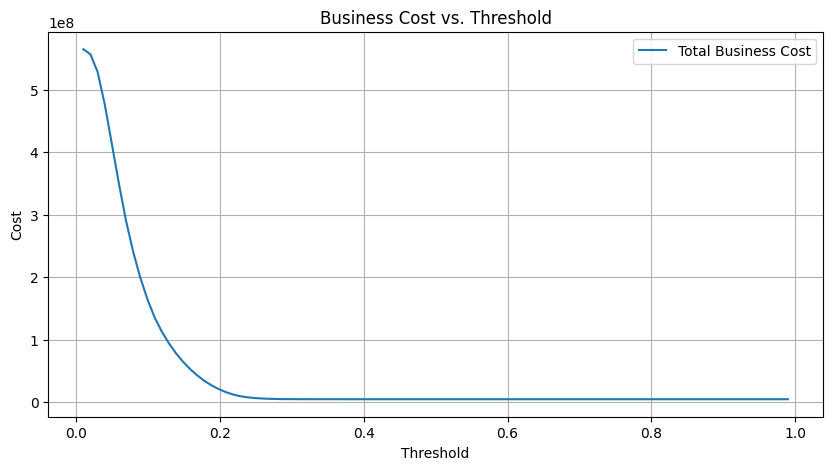

In [10]:
# Step 9: Plot Cost vs Threshold

plt.figure(figsize=(10, 5))
plt.plot(thresholds, total_costs, label='Total Business Cost')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Business Cost vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
# Step 10: Optimal Threshold

optimal_thresh = thresholds[np.argmin(total_costs)]
print(f"Optimal Threshold = {optimal_thresh:.2f}")

Optimal Threshold = 0.38
